# Pandas II: Operaciones con la base de datos "Titanic"

* **PassengerId**: identificador de cada pasajero.
* **Survived**: Supervivencia (0 = No; 1 = Sí).
* **Pclass**: 3 clases: Clase 1, Clase 2 and Clase 3.
* **Name**: Nombre del pasajero.
* **Sex**: Género del pasajero.
* **Age**: Edad del pasajero.
* **SibSp**: Número de hermanos/conyuges abordo.
* **Parch**: Número de padres/hijos abordo.
* **Ticket**: Número de ticket del pasajero.
* **Fare**: Tarifa.
* **Cabin**: La cabina del pasajero.
* **Embarked**: Puerto de embarque.

## Leer y escribir

![](https://pandas.pydata.org/docs/_images/02_io_readwrite.svg)

In [ ]:
import pandas as pd

import matplotlib.pyplot as plt
plt.style.use('ggplot')

# Lectura

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/pandas-dev/pandas/master/doc/data/titanic.csv")

In [ ]:
!ls sample_data

✅**Ejercicio: Implementar en Seaborn algunas gráficas que evidencien la relación entre algunas variables**

Ejemplo de una lectura local

In [ ]:
df_ = pd.read_csv("sample_data/california_housing_train.csv")

In [ ]:
df_.info()

## $\texttt{DataFrame.head(n=5)}$

In [ ]:
df.info()

In [ ]:
df.head()  # 5 pasajeros

In [ ]:
df.head(10)

## $\texttt{DataFrame.tail(n=5)}$

In [ ]:
df.tail(8)

## $\texttt{DataFrame.columns}$

In [ ]:
df.dtypes

In [ ]:
df.columns

In [ ]:
df.shape

# Modificar

In [ ]:
df = df.rename(columns={'SibSp': 'HerConys', 'Parch': 'PadHijs', 'Fare': 'Tarifa'})

In [ ]:
df.columns

In [ ]:
df.head()

# Describe

In [ ]:
df["Embarked"].describe()

In [ ]:
df["Embarked"].value_counts()

In [ ]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
HerConys         0
PadHijs          0
Ticket           0
Tarifa           0
Cabin          687
Embarked         2
_Sex             0
_Embarked        0
dtype: int64

# Guardar

In [ ]:
df.to_excel("titanic.xlsx", sheet_name="passengers", index=False)

In [ ]:
!ls

In [ ]:
df = pd.read_excel("titanic.xlsx")

In [ ]:
df.info()

# Subsets

![](https://pandas.pydata.org/docs/_images/03_subset_columns.svg)

In [ ]:
df.head()

In [ ]:
name_age = df[["Name", "Age"]]

In [ ]:
name_age.info()

In [ ]:
name_age.head()

In [ ]:
type(name_age)

In [ ]:
df.head()

In [ ]:
class_12 = df[df["Pclass"].isin([1,2])]

In [ ]:
class_12.head()

In [ ]:
class_12 = df[(df["Pclass"]==1) | (df["Pclass"]==2)]
class_12.head()

In [ ]:
df.info()

Agrupar por Sex

In [ ]:
df.groupby(by="Sex").count()

## Filas y columnas específicas

In [ ]:
nombres_adultos = df.loc[df["Age"] >= 18, "Name"]
nombres_adultos.head()

In [ ]:
nombres_adultos.shape

In [ ]:
df.head(10)

In [ ]:
df.iloc[3:6, 1:5]

# Reemplazar

In [ ]:
df.head()

In [ ]:
df.isnull().sum()

In [ ]:
df.columns

In [ ]:
df['_Sex']      = pd.Categorical(df.Sex).codes            # df.Sex == df["Sex"]
df['_Embarked'] = pd.Categorical(df.Embarked).codes

In [ ]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'HerConys',
       'PadHijs', 'Ticket', 'Tarifa', 'Cabin', 'Embarked', '_Sex',
       '_Embarked'],
      dtype='object')

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,HerConys,PadHijs,Ticket,Tarifa,Cabin,Embarked,_Sex,_Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,2


In [ ]:
df_ = df.drop(["Sex","Name","Ticket","Cabin","Embarked"], axis=1)
df_.head()

,PassengerId,Survived,Pclass,Age,HerConys,PadHijs,Tarifa,_Sex,_Embarked
0,1,0,3,22.0,1,0,7.2500,1,2
1,2,1,1,38.0,1,0,71.2833,0,0
2,3,1,3,26.0,0,0,7.9250,0,2
3,4,1,1,35.0,1,0,53.1000,0,2
4,5,0,3,35.0,0,0,8.0500,1,2


In [ ]:
df_ = df_.rename(columns={'_Sex': 'Sex', '_Embarked': 'Embarked'})
df_.head()

,PassengerId,Survived,Pclass,Age,HerConys,PadHijs,Tarifa,Sex,Embarked
0,1,0,3,22.0,1,0,7.2500,1,2
1,2,1,1,38.0,1,0,71.2833,0,0
2,3,1,3,26.0,0,0,7.9250,0,2
3,4,1,1,35.0,1,0,53.1000,0,2
4,5,0,3,35.0,0,0,8.0500,1,2


In [ ]:
mcorr = df_.corr()
mcorr

,PassengerId,Survived,Pclass,Age,HerConys,PadHijs,Tarifa,Sex,Embarked
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658,0.042939,0.012985
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,-0.543351,-0.176509
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,0.131900,0.173511
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,0.093254,-0.044830
HerConys,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,-0.114631,0.071480
PadHijs,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,-0.245489,0.043351
Tarifa,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,-0.182333,-0.230365
Sex,0.042939,-0.543351,0.131900,0.093254,-0.114631,-0.245489,-0.182333,1.000000,0.118492
Embarked,0.012985,-0.176509,0.173511,-0.044830,0.071480,0.043351,-0.230365,0.118492,1.000000


## Seaborn

In [ ]:
import seaborn as sns

sns.set(font_scale=1)

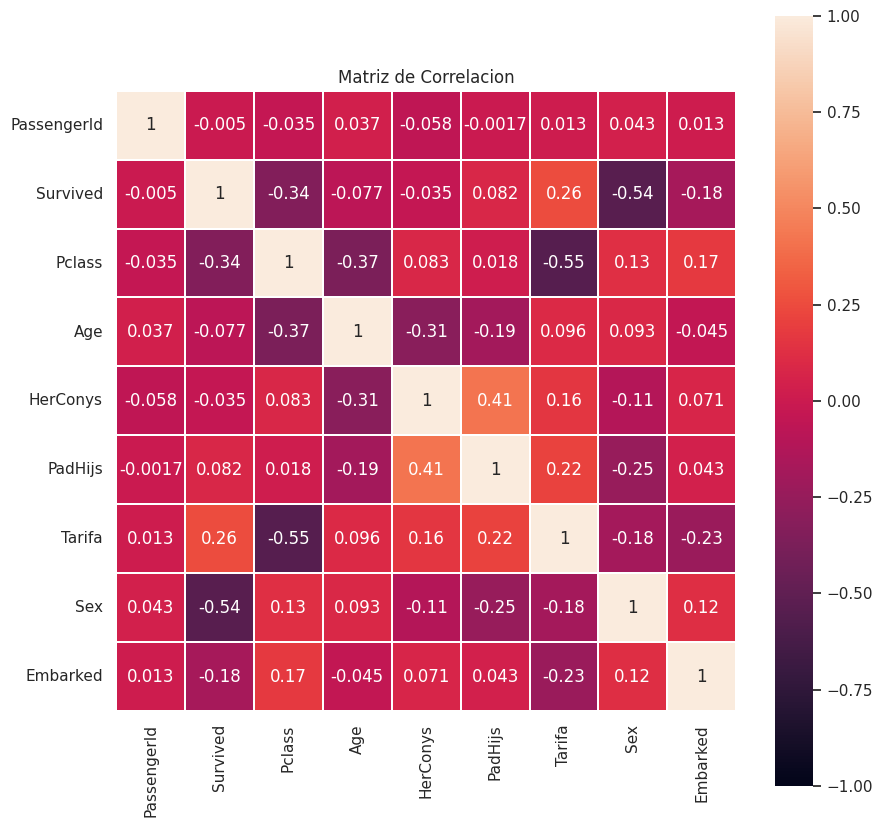

In [ ]:
plt.figure(figsize=(10, 10))

sns.heatmap(mcorr, vmin=-1.,vmax=1., linewidths=0.01, square=True, annot=True, linecolor="white")
plt.title('Matriz de Correlacion');

In [ ]:
df_.corr()["Embarked"].sort_values() # Por defecto ascendente

Tarifa        -0.230365
Survived      -0.176509
Age           -0.044830
PassengerId    0.012985
PadHijs        0.043351
HerConys       0.071480
Sex            0.118492
Pclass         0.173511
Embarked       1.000000
Name: Embarked, dtype: float64

In [ ]:
df_.corr()['Embarked'].sort_values(ascending=False) # Descendente

Embarked       1.000000
Pclass         0.173511
Sex            0.118492
HerConys       0.071480
PadHijs        0.043351
PassengerId    0.012985
Age           -0.044830
Survived      -0.176509
Tarifa        -0.230365
Name: Embarked, dtype: float64

In [ ]:
df["Embarked"].isnull()

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Name: Embarked, Length: 891, dtype: bool

In [ ]:
df[df["Embarked"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,HerConys,PadHijs,Ticket,Tarifa,Cabin,Embarked,_Sex,_Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,0,-1
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,0,-1


In [ ]:
clase1_mujer = df[(df["Pclass"]==1) & (df["Sex"]=="female")]
clase1_mujer.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,HerConys,PadHijs,Ticket,Tarifa,Cabin,Embarked,_Sex,_Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,2
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,0,2
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C,0,0
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C,0,0


In [ ]:
clase1_mujer["Embarked"].describe()

count     92
unique     3
top        S
freq      48
Name: Embarked, dtype: object

In [ ]:
df[df["Embarked"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,HerConys,PadHijs,Ticket,Tarifa,Cabin,Embarked,_Sex,_Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,0,-1
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,0,-1


In [ ]:
df.at[61,"Embarked"]= 'S' # class1_female.mean()
df.at[829,"Embarked"]= 'S'

In [ ]:
df[df["Embarked"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,HerConys,PadHijs,Ticket,Tarifa,Cabin,Embarked,_Sex,_Embarked


In [ ]:
df.iloc[826:830,:]

,PassengerId,Survived,Pclass,Name,Sex,Age,HerConys,PadHijs,Ticket,Tarifa,Cabin,Embarked,_Sex,_Embarked
826,827,0,3,"Lam, Mr. Len",male,NaN,0,0,1601,56.4958,NaN,S,1,2
827,828,1,2,"Mallet, Master. Andre",male,1.0,0,2,S.C./PARIS 2079,37.0042,NaN,C,1,0
828,829,1,3,"McCormack, Mr. Thomas Joseph",male,NaN,0,0,367228,7.7500,NaN,Q,1,1
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0000,B28,S,0,-1


In [ ]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
HerConys         0
PadHijs          0
Ticket           0
Tarifa           0
Cabin          687
Embarked         0
_Sex             0
_Embarked        0
dtype: int64

## **Ejercicios**

In [ ]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
HerConys         0
PadHijs          0
Ticket           0
Tarifa           0
Cabin          687
Embarked         0
_Sex             0
_Embarked        0
dtype: int64

Rellenar para la columna "Age"

In [ ]:
df_.corr()['Age'].sort_values(ascending=False)

Age            1.000000
Tarifa         0.096067
Sex            0.093254
PassengerId    0.036847
Embarked      -0.044830
Survived      -0.077221
PadHijs       -0.189119
HerConys      -0.308247
Pclass        -0.369226
Name: Age, dtype: float64

In [ ]:
df.iloc[885:890]

,PassengerId,Survived,Pclass,Name,Sex,Age,HerConys,PadHijs,Ticket,Tarifa,Cabin,Embarked,_Sex,_Embarked
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.125,NaN,Q,0,1
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.000,NaN,S,1,2
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.000,B42,S,0,2
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.450,NaN,S,0,2
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.000,C148,C,1,0


In [ ]:
df_clase1_no_corruptos = df[df["Age"].isna()==False][df["Pclass"]==1]

<ipython-input-149-3354e8631632>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_clase1_no_corruptos = df[df["Age"].isna()==False][df["Pclass"]==1]


In [ ]:
df_clase1_no_corruptos.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,HerConys,PadHijs,Ticket,Tarifa,Cabin,Embarked,_Sex,_Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,2
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,1,2
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,0,2
23,24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S,1,2


In [ ]:
df_clase1_no_corruptos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 186 entries, 1 to 889
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  186 non-null    int64  
 1   Survived     186 non-null    int64  
 2   Pclass       186 non-null    int64  
 3   Name         186 non-null    object 
 4   Sex          186 non-null    object 
 5   Age          186 non-null    float64
 6   HerConys     186 non-null    int64  
 7   PadHijs      186 non-null    int64  
 8   Ticket       186 non-null    object 
 9   Tarifa       186 non-null    float64
 10  Cabin        160 non-null    object 
 11  Embarked     186 non-null    object 
 12  _Sex         186 non-null    int8   
 13  _Embarked    186 non-null    int8   
dtypes: float64(2), int64(5), int8(2), object(5)
memory usage: 19.3+ KB


In [ ]:
df_clase1_no_corruptos["Age"].median()

37.0

In [ ]:
edad_media_clase1 = int(df_clase1_no_corruptos["Age"].median())

In [ ]:
edad_media_clase1

37

In [ ]:
df["Age"][df["Pclass"]==1] = df["Age"][df["Pclass"]==1].fillna(edad_media_clase1)

<ipython-input-156-c14db7f32f17>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Age"][df["Pclass"]==1] = df["Age"][df["Pclass"]==1].fillna(edad_media_clase1)


In [ ]:
df["Age"][df["Pclass"]==1].isnull().sum()

0

In [ ]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            147
HerConys         0
PadHijs          0
Ticket           0
Tarifa           0
Cabin          687
Embarked         0
_Sex             0
_Embarked        0
dtype: int64

# Gráficos en Pandas
![](https://pandas.pydata.org/docs/_images/04_plot_overview.svg)

## Box plot: $\texttt{df.plot.box}$

<Axes: >

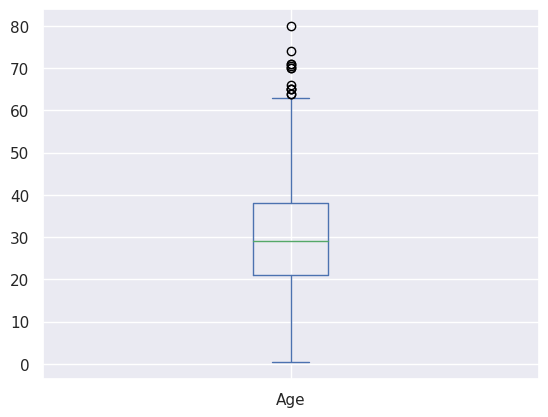

In [ ]:
df["Age"].plot.box()

In [ ]:
df["Age"].median()

29.0

In [ ]:
df["Age"].mean()

29.993508064516128

In [ ]:
df["Age"].max()

80.0

In [ ]:
df["Age"].min()

0.42

<Axes: >

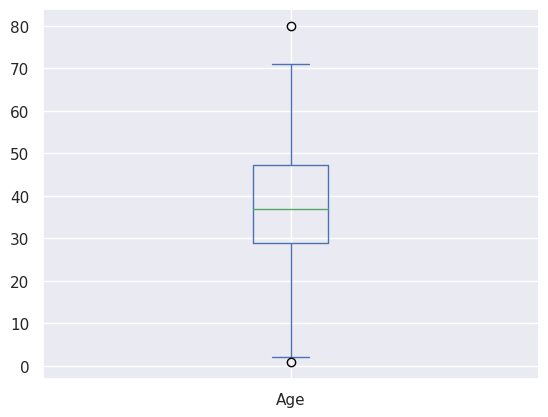

In [ ]:
df[df["Pclass"]==1]["Age"].plot.box()

In [ ]:
df[df["Pclass"]==1]["Age"].median()

37.0

In [ ]:
df[df["Pclass"]==1]["Age"].mean()

38.06212962962963

<Axes: >

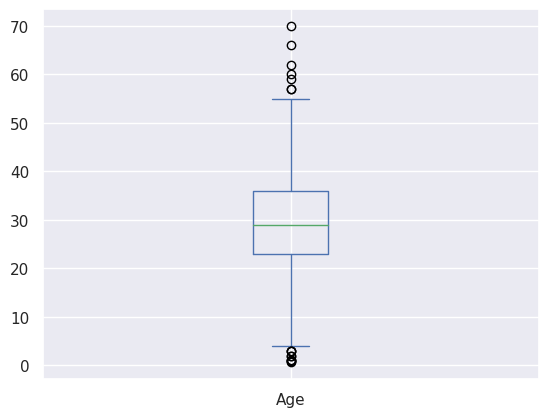

In [ ]:
df[df["Pclass"]==2]["Age"].plot.box()

In [ ]:
df[df["Pclass"]==2]["Age"].mean()

29.87763005780347

In [ ]:
df[df["Pclass"]==2]["Age"].median()

29.0

<Axes: >

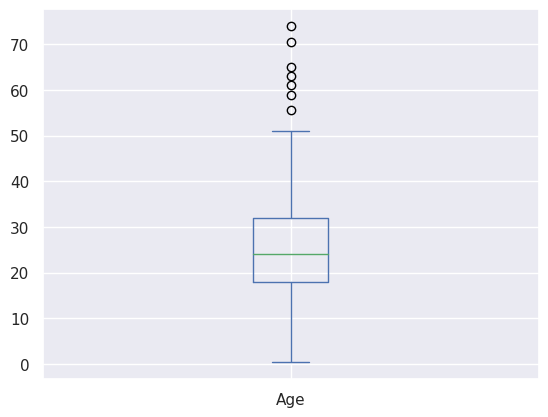

In [ ]:
df[df["Pclass"]==3]["Age"].plot.box()

In [ ]:
df[df["Pclass"]==3]["Age"].median()

24.0

## Hisogramas: $\texttt{hist}$

In [ ]:
df.Survived.value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

<Axes: xlabel='Survived'>

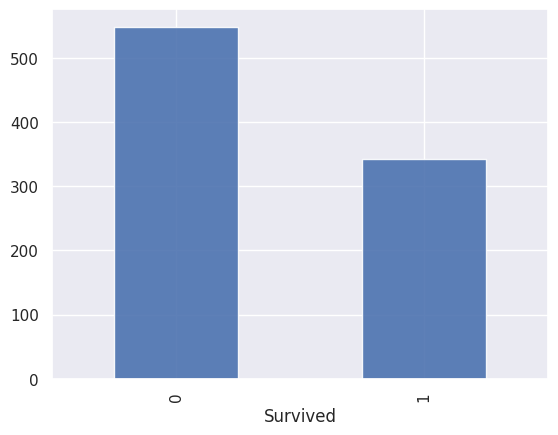

In [ ]:
df.Survived.value_counts().plot(kind="bar",alpha=0.9)

<Axes: title={'center': 'Histograma'}, xlabel='Survived'>

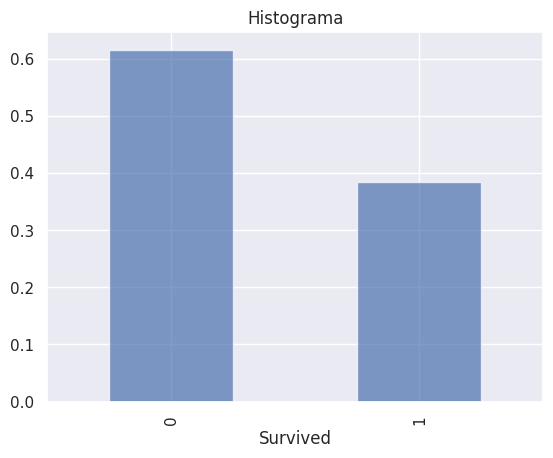

In [ ]:
df.Survived.value_counts(normalize=True).plot(title="Histograma", kind="bar",alpha=0.7)

<Axes: >

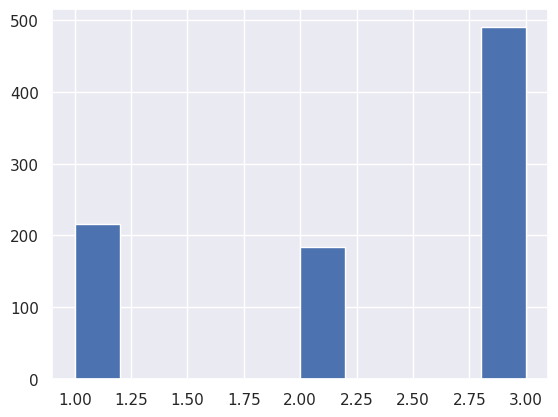

In [ ]:
df["Pclass"].hist()

array([[<Axes: title={'center': 'Survived'}>,
        <Axes: title={'center': 'Pclass'}>]], dtype=object)

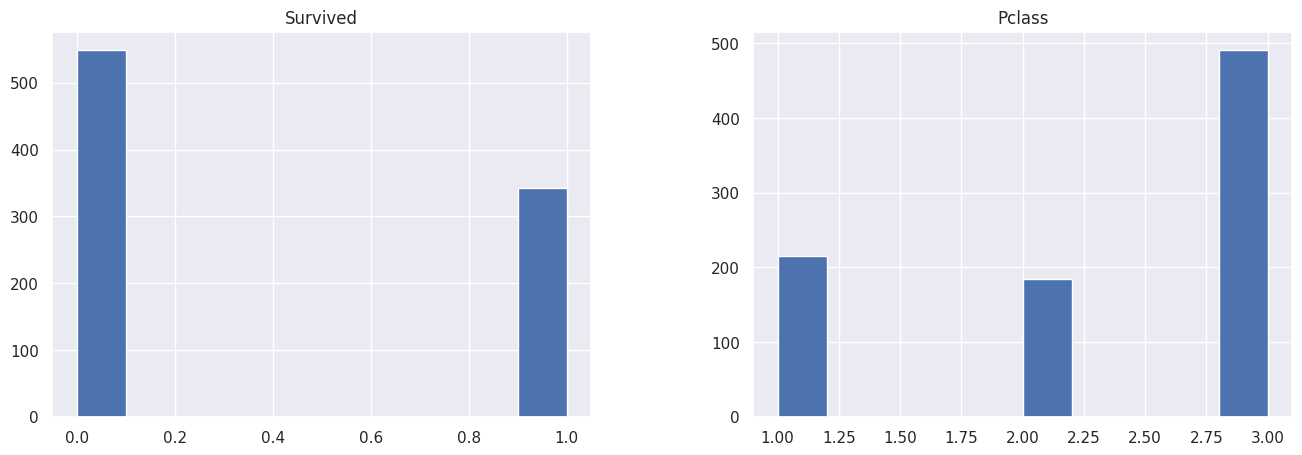

In [ ]:
df[["Survived","Pclass"]].hist(figsize=(16,5))

Text(0, 0.5, 'Conteo de edades')

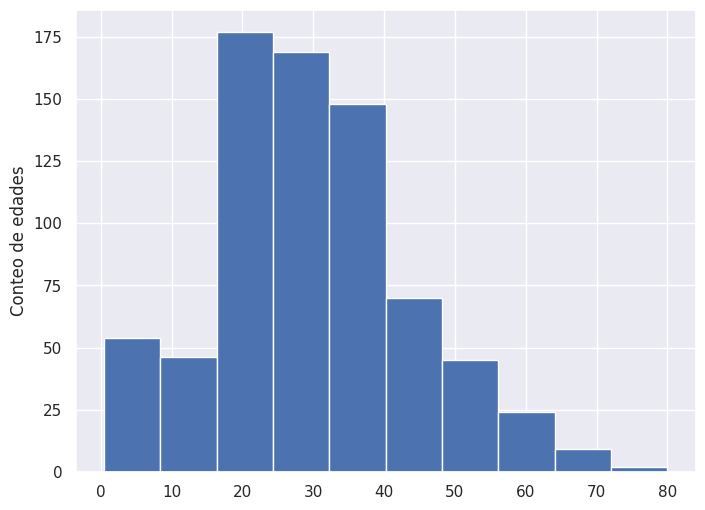

In [ ]:
df.Age.dropna().hist(figsize=(8,6), bins=10)
plt.ylabel("Conteo de edades")